In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

import matplotlib.pyplot as plt


In [4]:
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "../input/gtsrb-german-traffic-sign/train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

../input/gtsrb-german-traffic-sign/train/0/
../input/gtsrb-german-traffic-sign/train/1/
../input/gtsrb-german-traffic-sign/train/2/
../input/gtsrb-german-traffic-sign/train/3/
../input/gtsrb-german-traffic-sign/train/4/
../input/gtsrb-german-traffic-sign/train/5/
../input/gtsrb-german-traffic-sign/train/6/
../input/gtsrb-german-traffic-sign/train/7/
../input/gtsrb-german-traffic-sign/train/8/
../input/gtsrb-german-traffic-sign/train/9/
../input/gtsrb-german-traffic-sign/train/10/
../input/gtsrb-german-traffic-sign/train/11/
../input/gtsrb-german-traffic-sign/train/12/
../input/gtsrb-german-traffic-sign/train/13/
../input/gtsrb-german-traffic-sign/train/14/
../input/gtsrb-german-traffic-sign/train/15/
../input/gtsrb-german-traffic-sign/train/16/
../input/gtsrb-german-traffic-sign/train/17/
../input/gtsrb-german-traffic-sign/train/18/
../input/gtsrb-german-traffic-sign/train/19/
../input/gtsrb-german-traffic-sign/train/20/
../input/gtsrb-german-traffic-sign/train/21/
../input/gtsrb-germa

In [7]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [9]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,validation_data=(X_val, y_val))

#Display of the accuracy and the loss values


Epoch 1/20
981/981 [==============================] - 60s 60ms/step - loss: 2.2828 - accuracy: 0.3769 - val_loss: 0.1787 - val_accuracy: 0.9666
Epoch 2/20
981/981 [==============================] - 59s 61ms/step - loss: 0.2977 - accuracy: 0.9090 - val_loss: 0.0598 - val_accuracy: 0.9861
Epoch 3/20
981/981 [==============================] - 59s 60ms/step - loss: 0.1474 - accuracy: 0.9538 - val_loss: 0.0322 - val_accuracy: 0.9918
Epoch 4/20
981/981 [==============================] - 59s 60ms/step - loss: 0.1088 - accuracy: 0.9661 - val_loss: 0.0235 - val_accuracy: 0.9949
Epoch 5/20
981/981 [==============================] - 59s 60ms/step - loss: 0.0931 - accuracy: 0.9702 - val_loss: 0.0190 - val_accuracy: 0.9952
Epoch 6/20
981/981 [==============================] - 58s 60ms/step - loss: 0.0795 - accuracy: 0.9756 - val_loss: 0.0166 - val_accuracy: 0.9958
Epoch 7/20
981/981 [==============================] - 58s 59ms/step - loss: 0.0720 - accuracy: 0.9787 - val_loss: 0.0144 - val_accuracy:

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [18]:
model.save("my_model.h5")

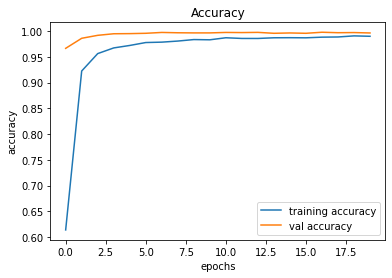

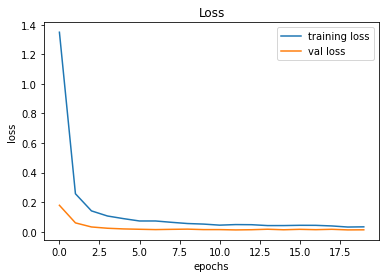

In [19]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [54]:
model.save("./kaggle/working/traffic_classifier.h5")